(-6.577812381098813, 6.545787871283655, -4.005943116726801, 3.9170262962411657)

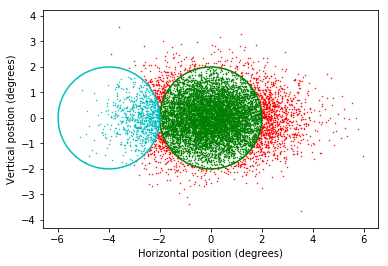

In [8]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0,2*np.pi)
M = 1.70445768373
sigx = 0.880425213744
sigy = 0.85
r = 2.0
step = 0.25
a = r*M
b = r

x0 = r*np.cos(theta)
y0 = r*np.sin(theta)

x1 = a*np.cos(theta)
y1 = b*np.sin(theta)

x2 = (x0-4)*np.cos(4*np.pi/180)
y2 = y0

points = 10000
mean = [0,0]
cov = [[(M*sigx)**2,0],[0,sigy**2]]

xr,yr = np.random.multivariate_normal(mean,cov,points).T
photons = np.array([xr,yr]).T


captured = []
captured_0 = []
for i in range(points):
    if photons[i][0]**2+photons[i][1]**2 < r**2:
        captured_0.append(photons[i])
captured_0 = np.array(captured_0)

captured_4 = []
for i in range(points):
    if ((photons[i][0]+4)*np.cos(4*np.pi/180))**2+photons[i][1]**2 < r**2:
        captured_4.append(photons[i])
captured_4 = np.array(captured_4)

double_counted = []
for i in range(len(captured_0)):
    for j in range(len(captured_4)):
        if np.all(captured_0[i] == captured_4[j]):
            double_counted.append(captured_0[i])

missed = []
for i in range(len(photons)):
    if (((photons[i][0]+4)*np.cos(4*np.pi/180))**2+photons[i][1]**2 > r**2) and (photons[i][0]**2+photons[i][1]**2 > r**2):
        missed.append(photons[i])
missed = np.array(missed)

'''missed = []
for photon in photons:
    if (photon not in captured_0) and (photon not in captured_4):
        missed.append(photon)'''
        
'''in_ellipse_x = []
in_ellipse_y = []
for i in range(points):
    if (xr[i]/a)**2+(yr[i]/b)**2 < 1:
        in_ellipse_x.append(xr[i])
        in_ellipse_y.append(yr[i])

lensed_out_x = []
lensed_out_y = []
for i in range(len(in_ellipse_x)):
    if (in_ellipse_x[i]**2+in_ellipse_y[i]**2) > r**2 and in_ellipse_x[i]<0:
        lensed_out_x.append(in_ellipse_x[i])
        lensed_out_y.append(in_ellipse_y[i])
        
captured_x = []
captured_y = []
missed_x = []
missed_y = []
for i in range(len(lensed_out_x)):
    if (((lensed_out_x[i]+2*r)*np.cos(4*np.pi/180))**2+lensed_out_y[i]**2) < r**2:
        captured_x.append(lensed_out_x[i])
        captured_y.append(lensed_out_y[i])
    else: 
        missed_x.append(lensed_out_x[i])
        missed_y.append(lensed_out_y[i])
'''
number0 = len(captured_0)
number4 = len(captured_4)
numbermissed = len(missed)
numberdoublecounted = len(double_counted)

captured_0 = captured_0.T
captured_4 = captured_4.T
missed = missed.T
#plt.plot(missed,'.r', markersize = 1, markevery = 100)
plt.plot(captured_0[0],captured_0[1],'.g',markersize = 1, markevery = 1)
plt.plot(captured_4[0],captured_4[1],'.c',markersize = 1, markevery = 1)
plt.plot(missed[0],missed[1],'.r',markersize = 1, markevery = 1)

plt.plot(x0,y0,'g')
#plt.plot(x1,y1,'m')
plt.plot(x2,y2,'c')
plt.xlabel('Horizontal position (degrees)')
plt.ylabel('Vertical postion (degrees)')

plt.axis("equal")

(-7.695680746182787,
 7.6997899582373135,
 -3.9388975216899405,
 4.240694770508914)

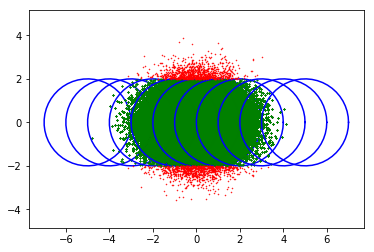

In [15]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0,2*np.pi)
M = 1.10680158642
sigx = 0.880425213744
sigy = 0.848159437315
r = 2
yoff = 0
step = 0.25

points = 100000
mean = [0,0]
cov = [[(M*sigx)**2,0],[0,sigy**2]]

xr,yr = np.random.multivariate_normal(mean,cov,points).T
photons = np.array([xr,yr]).T

x = []
y = []
captured = []
numbercaptured = []
for i in range(-20,21):
    x.append((r*np.cos(theta)+i*step)*np.cos(step*0.25*np.pi/180))
    y.append(r*np.sin(theta)-yoff)
    captured.append([])
    
    for j in range(points):
        if ((photons[j][0]-i*step)/np.cos(step*0.25*np.pi/180))**2+(photons[j][1]+yoff)**2 < r**2:
            captured[i+20].append(photons[j])
            
    numbercaptured.append(len(captured[i+20]))
    captured[i+20] = np.array(captured[i+20]).T
    if len(captured[i+20])>0:
        plt.plot(captured[i+20][0],captured[i+20][1],'.g',markersize = 1, markevery = 1)
    if i%4 == 0:
        plt.plot(x[i+20],y[i+20],'b')
    
missed = []
for i in range(len(photons)):
    check = []
    for j in range(-20,21):
        check.append(int(((photons[i][0]-j*step)/np.cos(j*step*np.pi/180))**2+(photons[i][1]+yoff)**2 > r**2))
    check = np.array(check)
    if sum(check) == len(check):
        missed.append(photons[i])
            
missed = np.array(missed).T
plt.plot(missed[0],missed[1],'.r',markersize = 1, markevery = 1)
plt.axis("equal")

In [16]:
print(max(numbercaptured))

90903


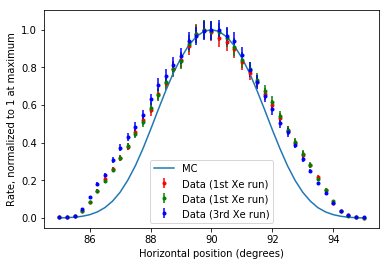

In [14]:
import matplotlib.pyplot as plt
import numpy as np

lxe_filename = ["/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Initial power and background at 178 nm/2018_11_01__14_53_11.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Sample 3/Power/2018_11_01__17_27_22.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/3rd Xenon Run Measurements/Power and background at 178 nm/2018_12_19__16_42_47.txt"]

#"/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Initial power and background at 178 nm/2018_11_01__14_53_11.txt",
#"/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Sample 3/Power/2018_11_01__17_27_22.txt",
#"/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 no bubbles/After getter/2018_12_03__10_45_16.txt"
#"/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 lower pressure/2018_12_05__13_18_24.txt",
#"/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 medium pressure/2018_12_05__15_23_35.txt",
#"/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 higher pressure/2018_12_05__17_00_20.txt",
#"/global/homes/r/rjsmith/OpticalPlotting/3rd Xenon Run Measurements/Power and background at 178 nm/2018_12_19__16_42_47.txt"


lxe_file = []
lxe_lines = []
lxe_data = []
lxe_incidentpower = []
lxe_intensities = []
lxe_relative_intensities = []
lxe_angles = []
lxe_err = []
lxe_relative_err = []

for filename in lxe_filename:
    lxe_file.append(open(filename))
    lxe_data.append(np.loadtxt(filename,skiprows = 12))

lxecolorlist= ['r','g','b','m','c','y','k']
for i in range(len(lxe_file)):
    lxe_lines.append(lxe_file[i].readlines())
    lxe_intensities.append(np.array([datum[1]-100 for datum in lxe_data[i]]))
    lxe_incidentpower.append(max(lxe_intensities[i]))
    lxe_relative_intensities.append(lxe_intensities[i]/lxe_incidentpower[i])
    lxe_angles.append(np.array([datum[0] for datum in lxe_data[i]]))
    lxe_err.append(np.sqrt(20**2+(0.05*lxe_intensities[i])**2))
    lxe_relative_err.append(lxe_err[i]/lxe_incidentpower[i])
    plt.errorbar(lxe_angles[i],lxe_relative_intensities[i],lxe_relative_err[i],fmt=lxecolorlist[i]+'.')

angles = []
predicted_intensities = []
for i in range(41):
    angles.append(85+0.25*i)
    predicted_intensities.append((numbercaptured[i])/(max(numbercaptured)))

plt.plot(angles,predicted_intensities)
plt.xlabel('Horizontal position (degrees)')
plt.ylabel('Rate, normalized to 1 at maximum')
plt.legend(['MC','Data (1st Xe run)','Data (1st Xe run)','Data (3rd Xe run)'])

In [4]:
print(len(missed.T))

1907


(-0.54892133119392661,
 0.54994863481875844,
 -0.5497174189103784,
 0.5497174189103784)

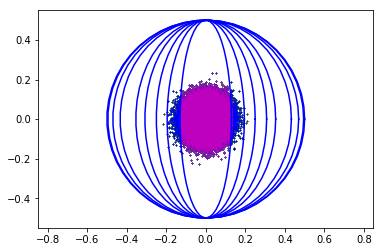

In [5]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0,2*np.pi)
M = 1
sigx = 0.05
sigy = 0.05
yoff = 0
r = 0.5
step = 0.25

points = 100000
mean = [0,0]
cov = [[(M*sigx)**2,0],[0,sigy**2]]

xr,yr = np.random.multivariate_normal(mean,cov,points).T
photons = np.array([xr,yr]).T

x = []
y = []
captured = []
numbercaptured = []
incident_angles = [0,8,20,30,45,52,60,67,75]
colorlist = ['g','b','m','c','y','k','g','b','m']
for i in range(len(incident_angles)):
    x.append((r*np.cos(theta))*np.cos(incident_angles[i]*np.pi/180))
    y.append(r*np.sin(theta))
    captured.append([]) 
    for j in range(points):
        if ((photons[j][0])/np.cos(incident_angles[i]*np.pi/180))**2+(photons[j][1])**2 < r**2:
            captured[i].append(photons[j])
            
    numbercaptured.append(len(captured[i]))
    captured[i] = np.array(captured[i]).T
    if len(captured[i])>0:
        plt.plot(captured[i][0],captured[i][1],'.'+colorlist[i],markersize = 1, markevery = 1)
   # if i%4 == 0:
    plt.plot(x[i],y[i],'b')
    
missed = []
for i in range(len(photons)):
    check = []
    for j in range(len(incident_angles)):
        check.append(int(((photons[i][0])/np.cos(incident_angles[j]*np.pi/180))**2+(photons[i][1])**2 > r**2))
    check = np.array(check)
    if sum(check) == len(check):
        missed.append(photons[i])
            
missed = np.array(missed).T
#plt.plot(missed[0],missed[1],'.r',markersize = 1, markevery = 1)
plt.axis("equal")

In [16]:
print(numbercaptured)

[100000, 100000, 100000, 100000, 100000, 100000, 100000, 99990, 98985]


In [4]:
5.5*np.sin(2*np.pi/180)

0.19194723186375534

In [12]:
180*np.arctan(0.5/5)/np.pi

5.710593137499643

5.208333333333334